In [1]:
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML

# Variables
**Electromagnetic Strength:** Something Addison help me

**Damping:** Something Addison help me

**Spring Coefficient:** Something Addison help me

**Butterworth Order:** Something Addison help me

**Butterworth Frequency:** Something Addison help me

In [2]:
electromagnetic_strength = 1
damping = 10000
spring_coefficient = 0

butterworth_order = 20
butterworth_frequency = 20

In [31]:
# Read Sample File
samplerate, original = wavfile.read('./dubstep.wav')
print("Total Data Length:", len(original), ", Sample Rate:",samplerate)

# Get maximum value of original (tells us how loud the original file is)
max_original = np.amax(np.absolute(original))

num_seconds = 5

beg = 0
end = samplerate * num_seconds
# end = len(original)

original = original[beg:end]

# Set start time to beginning 
time = beg

Total Data Length: 5507847 , Sample Rate: 44100


# Doing Our Adjustments

In [32]:
first_integral_last_value = 0
second_integral_last_value = 0

adjusted = []
while time<end:
    electromagnetic_force = electromagnetic_strength * original[time] # ElectromagneticStrength * InputSignal
    
    first_integral = original[time] + first_integral_last_value # Integral(InputSignal)
    second_integral = first_integral + second_integral_last_value  # Integral(Integral(InputSignal))

    damped_signal = damping * first_integral # Damping * Integral(InputSignal)
    springed_signal = spring_coefficient * second_integral # SpringCoefficient * Integral(Integral(InputSignal))

    last_input_integral_1 = first_integral
    last_input_integral_2 = second_integral

    output = electromagnetic_force - (damped_signal + springed_signal)

    adjusted.append(output)

    time += 1

# Creating the Butter Filter
This uses `scipy.signal`

In [33]:
sos = signal.butter(butterworth_order,butterworth_frequency,"highpass",fs=samplerate, output="sos")

buttered_original = signal.sosfilt(sos, original)
buttered_adjusted = signal.sosfilt(sos, adjusted)

# Stabilizing Values
The new audio file often comes out on a very different scale than the original, so we set the maximum values equal to account for this

In [37]:
def normalize(values):
    max_values = np.amax(np.absolute(values))
    scalar = (max_original / max_values)
    print("Scalar:", scalar)
    
    for i in range(len(values)):
        values[i] = scalar * values[i]

    return values
    
# original = stabilize(original)
print("adjusted pre-normalized", adjusted)
adjusted = normalize(adjusted)

buttered_original = normalize(buttered_original)

print("buttered_adjusted pre-normalized", buttered_adjusted)
buttered_adjusted = normalize(buttered_adjusted)

adjusted pre-normalized 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Scalar: 1.0182940663466205
buttered_adjusted pre-normalized [[     0.              0.        ]
 [     0.              0.        ]
 [     0.           9819.06424203]
 ...
 [ -6309.37971348 -16944.14963188]
 [ 15428.27465812  -3569.19405399]
 [ -9902.53463513  26045.94022983]]
Scalar: 0.9827291599990371


# Plotting New Values

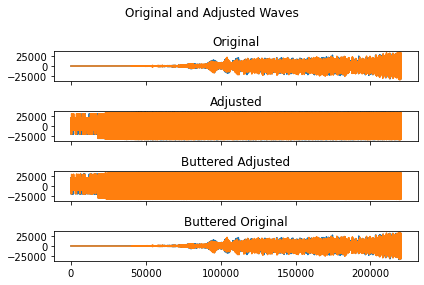

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle('Original and Adjusted Waves')

ax1.plot(original)
ax1.set_title("Original")

ax2.plot(adjusted)
ax2.set_title("Adjusted")

ax3.plot(buttered_adjusted)
ax3.set_title("Buttered Adjusted")

ax4.plot(buttered_original)
ax4.set_title("Buttered Original")

plt.tight_layout()
plt.show()

# Saving the New File

In [36]:
wavfile.write("output.wav", samplerate, buttered_adjusted)

# Fast Fourier Transform

In [9]:
import scipy.fftpack 
# Number of samplepoints 
N = 600 
# sample spacing 
T = 1.0 / 800.0 
x = np.linspace(0.0, N*T, N) 
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y) 
xf = np.linspace(0.0, 1.0/(2.0*T), N/2) 
figure, ax = plt.subplots() 
ax.plot(xf, 2.0/N * np.abs(yf[:N//2])) 
plt.show()

TypeError: 'float' object cannot be interpreted as an integer